# Project
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.
## Objective
The classification goal is to predict the likelihood of a liability customer buying personal loans.

In [115]:
#import the necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt

In [116]:
#populate dataframe with file
bank_records= pd.read_csv("Bank_Personal_Loan_Modelling.csv")
#View top records
bank_records.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [118]:
bank_records.shape

(5000, 14)

### Question 1:  Read the column description and ensure you understand each attribute well
#### Data Exploration Basic EDA

In [117]:
print(bank_records.columns)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')


In [53]:
# Get View Of All the columns
bank_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


There are no null value in any column

In [119]:
bank_records.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [58]:
# Chech if there is any null Value 
bank_records.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

No Null value found

### Hypothesis Generation

#### Major Independent Variable 

Salary: Salary can be one of the major dependent variables as customers with high salaries are less feasible to buy personal loans while customers with medium or low salaries are more feasible for buying personal loans.
The number of family members: More the number of earning family members, less probability of buying personal loans.

Age: Customers with probably the age of 30–50 will buy personal loans.

Education of the customer: The customer is a graduate or under-graduate can affect the buying probability, people who are graduated or Advanced Professionals are more viable to buy personal loans from a bank rather than people who are under-graduated.

Mortgage : if the customer already has mortgage customer might be under debt and likely to buy a personal loan.



In [37]:
# Check if there is any negative value in dataframe which could effect the reading 

bank_records.agg(lambda x: sum(x < 0)).sum()


52

there exist 52 negative values through out the data frame , we need be sure if this value is any column which should not have negative values

In [38]:
#Experience Column should not have any negative values since experinece can not be negative 
bank_records[bank_records['Experience']<0]['Experience'].count()



52

In [39]:
#Replacing the Negative value with numpy nan nan
bank_records[bank_records['Experience'] < 0] = np.nan

In [40]:
# Validating if there exists any ngative value post modification 
bank_records[bank_records['Experience'] <0]['Experience'].count()

0

In [44]:
#Replace All the NaN with median Values
bank_records['Experience'].fillna(bank_records['Experience'].median(),inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


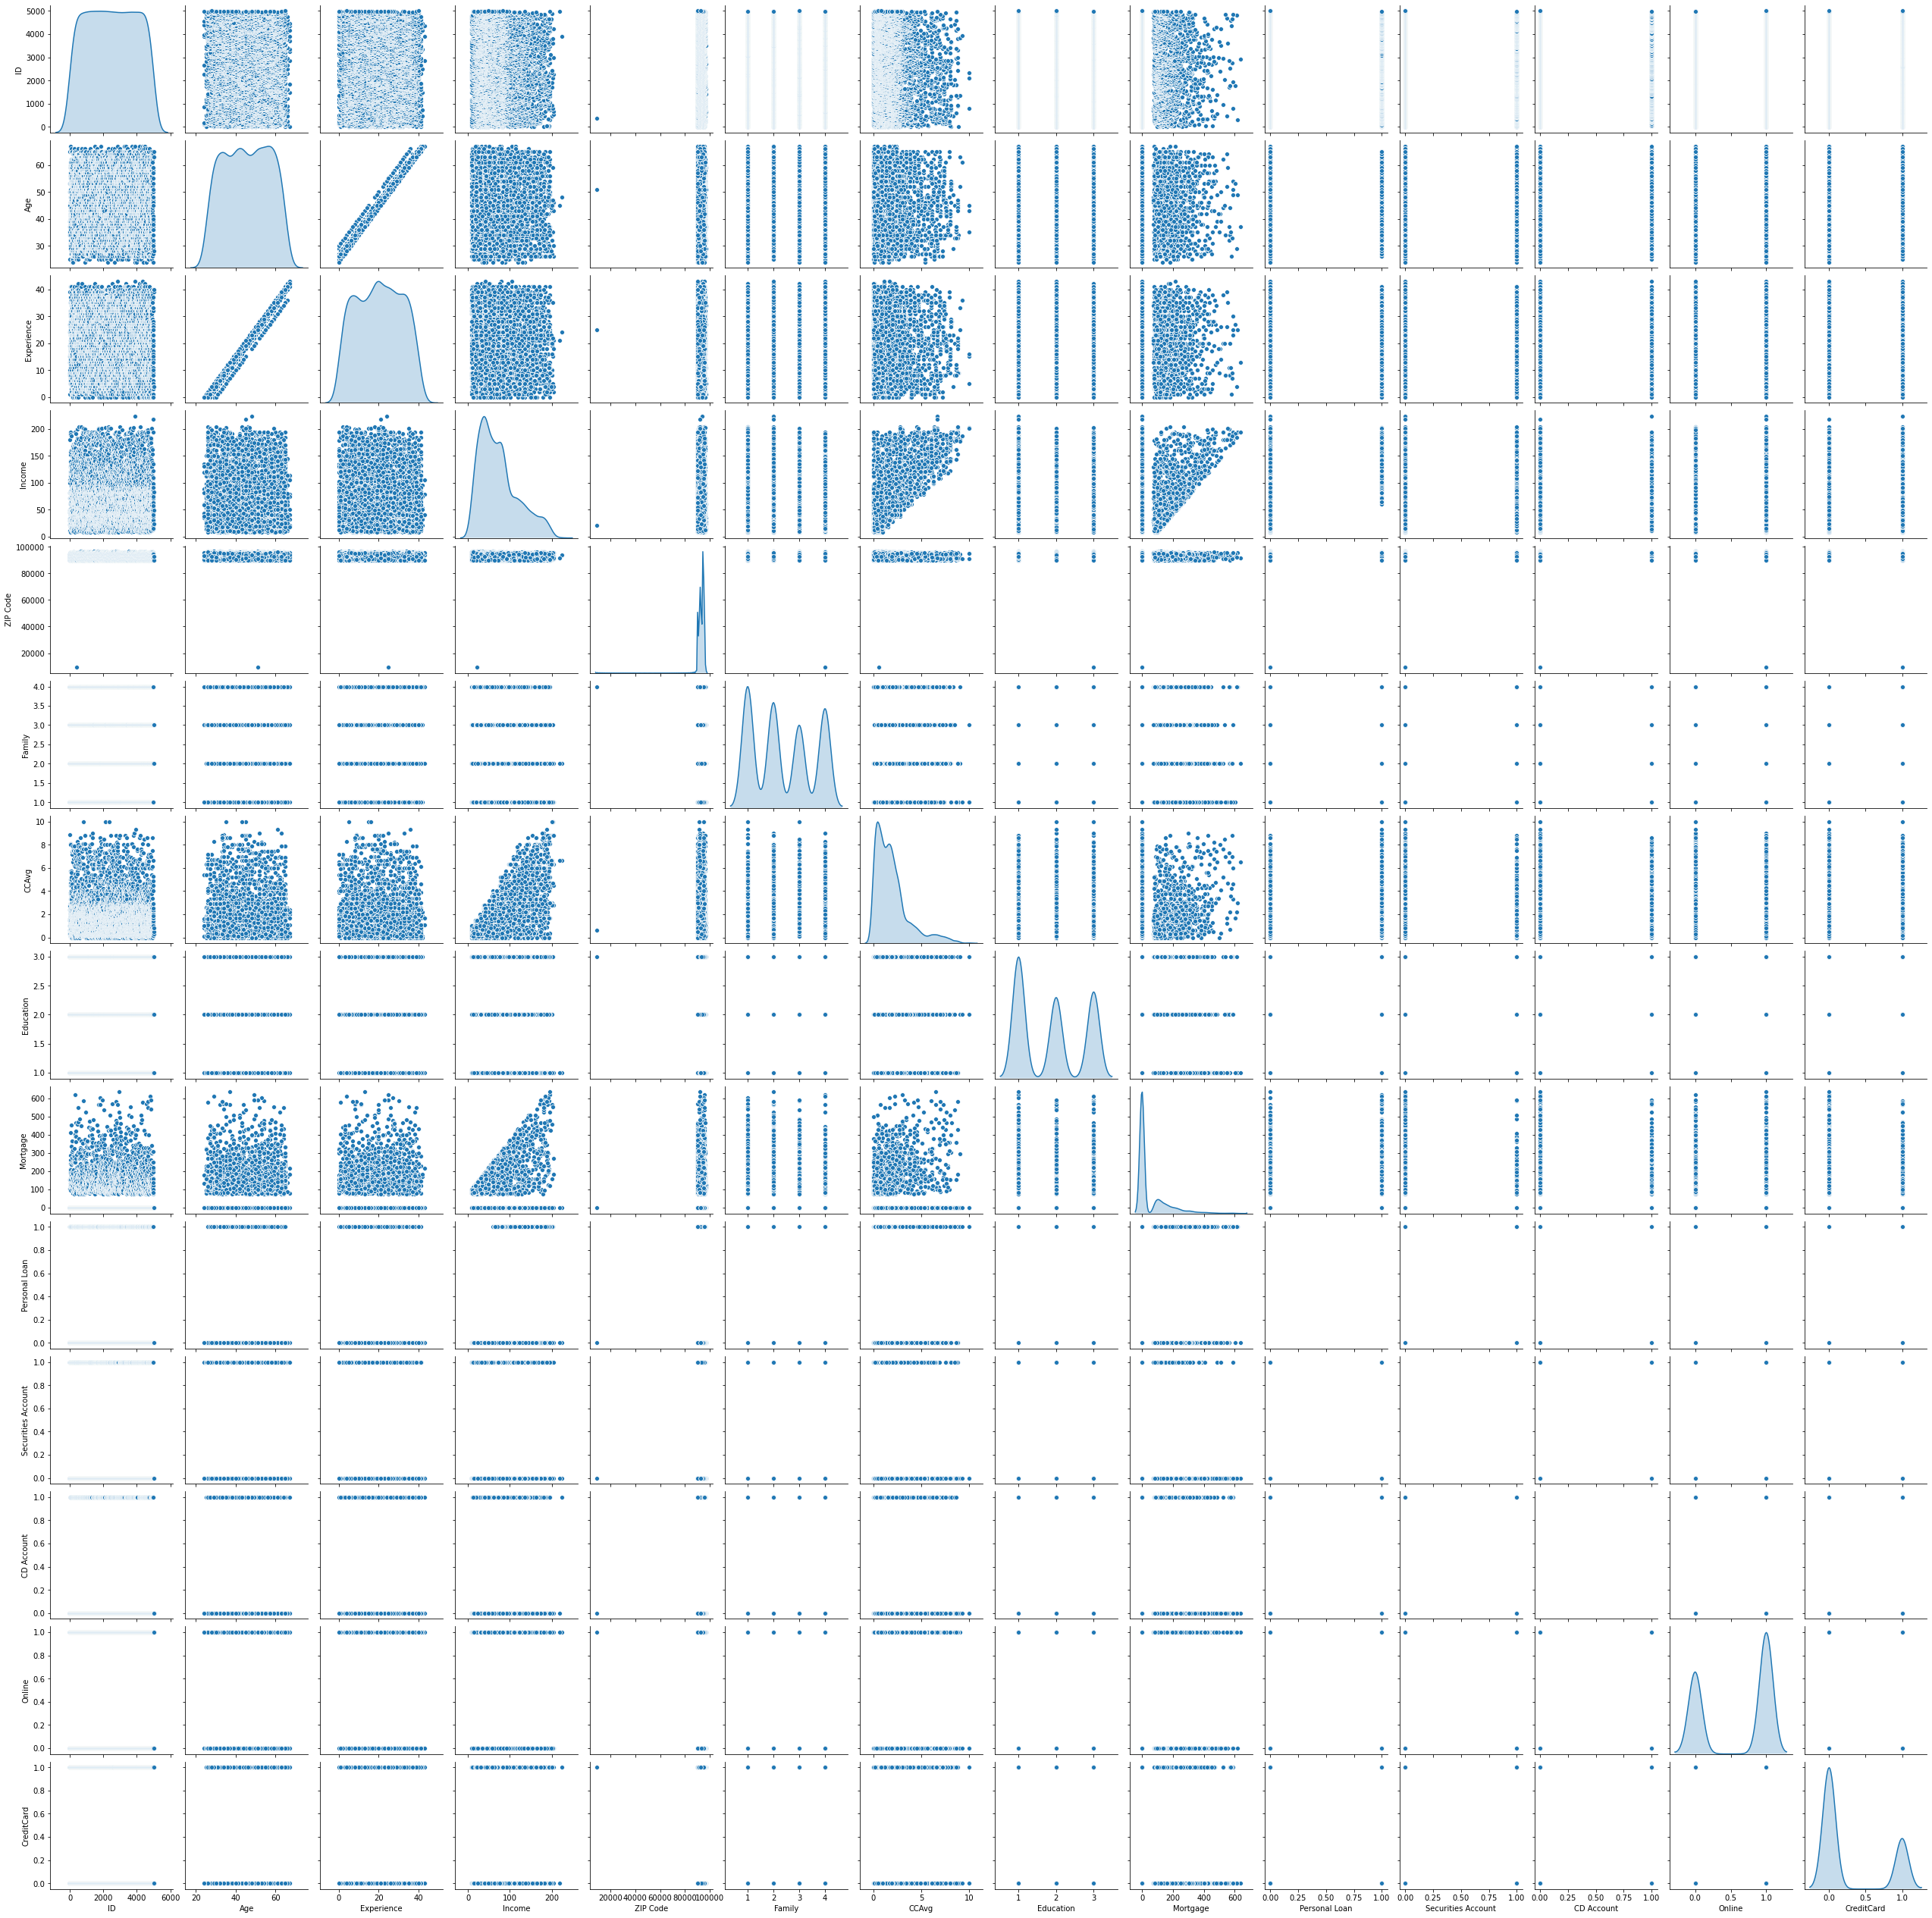

In [48]:
# Plot the Data Distribution
sns.pairplot(data=bank_records,kind='kde')

## Question2: Study the data distribution in each attribute, share your findings. (15 marks)

In [63]:
# install pandas profiling an tool to perform autamated EDA 
import sys
!{sys.executable} -m pip install pandas-profiling

  Using cached pandas_profiling-2.9.0-py2.py3-none-any.whl (258 kB)
  Using cached htmlmin-0.1.12.tar.gz (19 kB)
  Using cached phik-0.10.0-py3-none-any.whl (599 kB)
  Using cached missingno-0.4.2-py3-none-any.whl (9.7 kB)
  Using cached tangled_up_in_unicode-0.0.6-py3-none-any.whl (3.1 MB)
  Using cached visions-0.5.0-py3-none-any.whl (64 kB)
  Using cached confuse-1.4.0-py2.py3-none-any.whl (21 kB)
  Using cached ImageHash-4.2.0-py2.py3-none-any.whl (295 kB)
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27084 sha256=9c307f8309db8f26f7f2e1547eead34451f7a79bcd15c223b902f0554c145528
  Stored in directory: /Users/shivji/Library/Caches/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin


In [64]:
# Performing the univariant analysis with the delp of pandas profiling 
import pandas_profiling 
bank_records.profile_report()

The data set got 0 missing cells.
It got 7 numeric variables: ‘Age’, ‘CC_Avg’, ‘ID’, ‘Income’, ‘Mortgage’, ‘Zip_Code’, ‘Experience’
It got 2 categorical variables: ‘Education’, ‘Family’
It got 5 Boolean variables: ‘CD_Account’, ‘Credit_Card’, ‘Online’, ‘Personal_Loan’, ‘Securities Account’
Personal Loan is highly correlated with Income, average spending on Credit cards, mortgage & if the customer has a certificate of deposit (CD) account with the bank.
Also, Experience is highly correlated with Age (ρ = 0.994214857)

### Categorical
42% of the candidates are graduated, while 30% are professional and 28% are Undergraduate.
Around 29% of the customer’s family size is 1.

### Boolean
94% of the customer doesn’t have a certificate of deposit (CD) account with the bank.
Around 71% of the customer doesn’t use a credit card issued by UniversalBank.
Around 60% of customers use internet banking facilities.
Around 90% of the customer doesn’t accept the personal loan offered in the last campaign.
Around 90% of the customer doesn’t have a securities account with the bank.

### Numeric
The mean age of the customers is 45 with standard deviation of 11.5. Also, we had estimated the average age in hypothesis testing between 30–50. The curve is slightly negatively skewed (Skewness = -0.02934068151) hence the curve is fairly symmetrical
The mean of Avg. spending on credit cards per month is 1.93 with standard deviation of 1.75. The curve is highly positive skewed (Skewness = 1.598443337)
The mean annual income of the customer is 73.77 with standard deviation of 46. The curve is moderately positive skewed (Skewness = 0.8413386073)
The mean value of house mortgage is 56.5 with standard deviation of 101.71. The curve is highly positive skewed (Skewness = 2.104002319) and there are a lot of outlier’s present (Kurtosis = 4.756796669)


In [125]:
# Dropping of ID’, ‘ZIP  code’ & ‘Experience’ columns for further analysis since ‘ID’ and ‘ZIP_Code’ 
#are just numbers of series 
#‘Experience’ is highly correlated with ‘Age’.

bank_records.drop('ID',axis=1 ,inplace=True)
bank_records.drop('ZIP Code',axis=1 ,inplace=True)
bank_records.drop('Experience',axis=1 ,inplace=True)

In [126]:
# Validating if all the columns are dropped
bank_records.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

As we saw earlier in univariate analysis, Mortgage contains outliers, 
so we must treat them as the presence of outliers affects the distribution of the data

In [132]:
from scipy import stats 
bank_records['Mortgage_Zscore']=np.abs(stats.zscore(bank_records['Mortgage']))
bank_records=bank_records[bank_records['Mortgage_Zscore']<3]  
bank_records.drop('Mortgage_Zscore',axis=1,inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [133]:
bank_records.shape

(4895, 11)

## Question 3: Get the target distribution (5 marks)

In [73]:
# Personal Loan is a Target Varaible of Boolean type
# 0 = Loan not granted in Last Campaign (90.4%)
# 1 = Loan not granted in Last Campaign  (9.6%)
bank_records["Personal Loan"].value_counts()


0    4520
1     480
Name: Personal Loan, dtype: int64

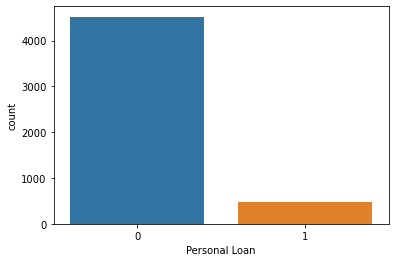

In [75]:
#Plotting the graph for count of people who took loan
sns.countplot(bank_records["Personal Loan"])

In [80]:
# Looking into the distribution to the various attributes in relation with the target.
bank_records.groupby(bank_records['Personal Loan']).mean()

Age      Income    Family     CCAvg  Education  \
Personal Loan                                                         
0              45.367257   66.237389  2.373451  1.729009   1.843584   
1              45.066667  144.745833  2.612500  3.905354   2.233333   

                 Mortgage  Securities Account  CD Account    Online  \
Personal Loan                                                         
0               51.789381            0.102212    0.035841  0.595796   
1              100.845833            0.125000    0.291667  0.606250   

               CreditCard  
Personal Loan              
0                0.293584  
1                0.297917

Observations: 1). The average Income of customers who took loan is more than double of the avg income of customers who didn’t take loan last year.

2). The Avg. spending on credit cards per month ($000) is also more than double for the customer's who took loan.

3). The average mortage for loan availing customers is approximately double for the not availing customers.

4). Avg literacy is less for non loan takers.

As given in the data description that person who took loan in the last camping is 9.6%.

### Question 4: Split the data into training and test set in the ratio of 70:30 respectively. (5 marks)

In [134]:
# Seprating the dependent and indepenedent variable and dividing in 70 : 30 Ratio
X= bank_records.drop('Personal Loan', axis=1)
y= bank_records['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

### Question 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans (15 marks)


#### Logistic Regression

In [139]:
# Creating Logistic Regression Model
logistic_reg_model= LogisticRegression(solver='liblinear', max_iter=1000)
# Fitting the x and y in logistic model 
logistic_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [156]:
# prediticting based on  the logistic regression
y_pred_logistic = logistic_reg_model.predict(X_test)

In [157]:
print('Accuracy of logistic regression classifier on training data set: {:.2f}'.format(logistic_reg_model.score(X_train, y_train)))

Accuracy of logistic regression classifier on training data set: 0.95


In [158]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logistic_reg_model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.95


Even though the accuracy is ver high ,number of buyer’s percentage to the non-buyer percentage is very less. 
Hence accuracy didn’t play a big role in determining how our model performed.
Lets determine the other performance parameters

#### Performance Metrics for Logistic Regression

In [159]:
# Printing the Performance metrics
print(classification_report(y_test,y_pred_logistic))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1341
           1       0.81      0.52      0.63       128

    accuracy                           0.95      1469
   macro avg       0.89      0.75      0.80      1469
weighted avg       0.94      0.95      0.94      1469



In [161]:
# printing the Acurracy Score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_logistic))

0.9475833900612661


#### confusion matrix for Logistic Regression

In [162]:
#printing the Confusion matrix
print(confusion_matrix(y_test,y_pred_logistic))

[[1326   15]
 [  62   66]]


#### ROC Curve for for Logistic Regression

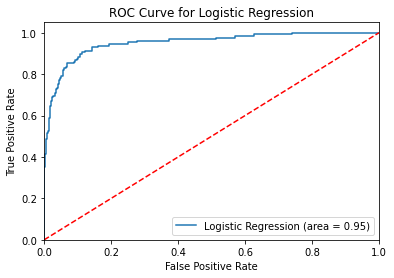

In [176]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logistic_r_probability=logistic_reg_model.predict_proba(X_test)
fpr_l,tpr_l,thr_l=roc_curve(y_test,logistic_r_probability[:,1])
roc_l = metrics.auc(fpr_l,tpr_l)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_l)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [169]:
logistic_r_probability=logistic_reg_model.predict_proba(X_test)
fpr_l,tpr_l,thr_l=roc_curve(y_test,logistic_r_probability[:,1])
roc_l = metrics.auc(fpr_l,tpr_l)
print('Area under ROC curve   %f'%roc_l)

Area under ROC curve   0.950847


As mentioned before, accuracy alone can’t define my model how well it predicted so we will try to improve the recall by scaling the features and trying yo see the performance of models 

In [179]:
from sklearn import preprocessing
colmn_names=bank_records.columns
scaler=preprocessing.StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test =scaler.fit_transform(X_test)

In [180]:
log_r_model= LogisticRegression(solver='liblinear')
log_r_model.fit(scaled_X_train,y_train)

LogisticRegression(solver='liblinear')

In [182]:
y_pred = log_r_model.predict(scaled_X_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1341
           1       0.82      0.59      0.69       128

    accuracy                           0.95      1469
   macro avg       0.89      0.79      0.83      1469
weighted avg       0.95      0.95      0.95      1469

0.9530292716133424
[[1324   17]
 [  52   76]]


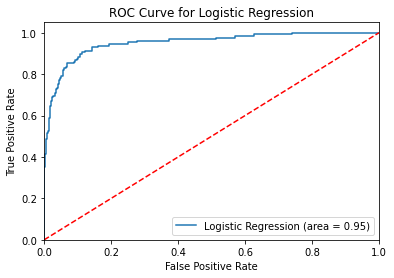

In [187]:
logistic_probability=log_r_model.predict_proba(scaled_X_test)
fpr2,tpr2,thr2=metrics.roc_curve(y_test,logistic_probability[:,1])
roc_2 = metrics.auc(fpr2,tpr2)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [189]:
logistic_probability=log_r_model.predict_proba(scaled_X_test)
fpr2,tpr2,thr2=metrics.roc_curve(y_test,logistic_probability[:,1])
roc_2 = metrics.auc(fpr2,tpr2)
print('Area under ROC curve   %f'%roc_2)

Area under ROC curve   0.949501


We get a recall value of 59%, which means our model did much better in predicting True Positives.
Also, the area under the curve is around 95%

#### KNN Classification on the scaled data

In [198]:
# Using the KNN Classification Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(scaled_X_train,y_train)
y_pred_knn=knn_model.predict(scaled_X_test)

In [201]:
print('Accuracy of KNN classifier on training data set: {:.2f}'.format(knn_model.score(scaled_X_train, y_train)))

Accuracy of KNN classifier on training data set: 0.97


In [204]:
print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn_model.score(scaled_X_test, y_test)))

Accuracy of KNN classifier on test set: 0.97


#### Performance Metrics of KNN

In [196]:
# Printing the Performance Metrics 
print(classification_report(y_test,y_pred_knn))
print(accuracy_score(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1341
           1       0.94      0.66      0.78       128

    accuracy                           0.97      1469
   macro avg       0.96      0.83      0.88      1469
weighted avg       0.97      0.97      0.96      1469

0.9673247106875426


#### Confusion Matrix for KNN

In [199]:
print(confusion_matrix(y_test,y_pred_knn))

[[1336    5]
 [  43   85]]


#### ROC Curve for KNN

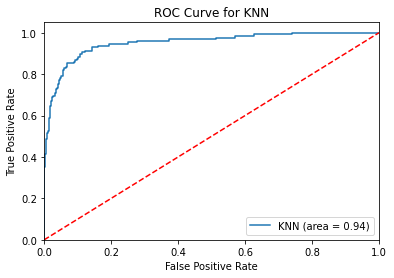

In [206]:
knn_probability=knn_model.predict_proba(scaled_X_test)
fpr_knn,tpr_knn,thr_knn=metrics.roc_curve(y_test,knn_probability[:,1])
roc_knn = metrics.auc(fpr_knn,tpr_knn)
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % roc_knn)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [205]:
knn_probability=knn_model.predict_proba(scaled_X_test)
fpr_knn,tpr_knn,thr_knn=metrics.roc_curve(y_test,knn_probability[:,1])
roc_knn = metrics.auc(fpr_knn,tpr_knn)
print('Area under ROC curve   %f'%roc_knn)

Area under ROC curve   0.936705


### Naive Bayes on scaled data 

In [208]:
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()
naive_model.fit(scaled_X_train,y_train)
y_pred_naive=naive_model.predict(scaled_X_test)

In [209]:
print('Accuracy of Naive Bayes classifier on training data set: {:.2f}'.format(naive_model.score(scaled_X_train, y_train)))

Accuracy of Naive Bayes classifier on training data set: 0.89


In [210]:
print('Accuracy of Naive Bayes on test set: {:.2f}'.format(naive_model.score(scaled_X_test, y_test)))

Accuracy of Naive Bayes on test set: 0.89


#### Performance Metrics of Naive Bayes

In [211]:
# Printing the Performance Metrics 
print(classification_report(y_test,y_pred_naive))
print(accuracy_score(y_test,y_pred_naive))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1341
           1       0.42      0.59      0.50       128

    accuracy                           0.89      1469
   macro avg       0.69      0.76      0.72      1469
weighted avg       0.91      0.89      0.90      1469

0.8944860449285228


#### Confusion Matrix for Naive Bayes

In [212]:
print(confusion_matrix(y_test,y_pred_naive))

[[1238  103]
 [  52   76]]


#### ROC Curve for Naive Bayes

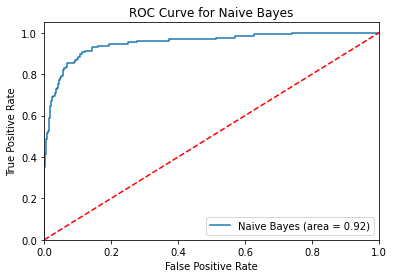

In [213]:
naive_probability=naive_model.predict_proba(scaled_X_test)
fpr_naive,tpr_naive,thr_naive=metrics.roc_curve(y_test,naive_probability[:,1])
roc_naive = metrics.auc(fpr_naive,tpr_naive)
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % roc_naive)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [214]:
naive_probability=naive_model.predict_proba(scaled_X_test)
fpr_naive,tpr_naive,thr_naive=metrics.roc_curve(y_test,naive_probability[:,1])
roc_naive = metrics.auc(fpr_naive,tpr_naive)
print('Area under ROC curve   %f'%roc_naive)

Area under ROC curve   0.924240


### Question 6. Print the confusion matrix for all the above models (5 marks)

#### Confusion Matrix for Logistics Regression

In [217]:
print(confusion_matrix(y_test,y_pred_logistic))

[[1326   15]
 [  62   66]]


#### Confusion Matrix for KNN

In [216]:
print(confusion_matrix(y_test,y_pred_knn))

[[1336    5]
 [  43   85]]


#### Confusion Matrix for Naive Bayes

In [215]:
print(confusion_matrix(y_test,y_pred_naive))

[[1238  103]
 [  52   76]]


### Question 7. Give your reasoning on which is the best model in this case and why it performs better? (5 marks)

KNN : Acurracy of KNN classifier whether a person will buy or not is 97 % 
which is higher than Logistic Regression and Naive Bayes , also the recall rate is 66 % 
is better than Logistic Regression and Naive Bayes. Area Unnder the curve is also fairly good 

Because of above reason KNN is best model of 3 (KNN,Logistic Regression and Naive Bayes)